In [1]:
import numpy as np
import pandas as pd

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
df_boston = pd.read_csv('src/boston.csv')
df_parisHousing = pd.read_csv('src/ParisHousing.csv')

In [3]:
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [4]:
df_boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [5]:
df_parisHousing.head()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0


In [43]:
df_parisHousing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   squareMeters       10000 non-null  int64  
 1   numberOfRooms      10000 non-null  int64  
 2   hasYard            10000 non-null  int64  
 3   hasPool            10000 non-null  int64  
 4   floors             10000 non-null  int64  
 5   cityCode           10000 non-null  int64  
 6   cityPartRange      10000 non-null  int64  
 7   numPrevOwners      10000 non-null  int64  
 8   made               10000 non-null  int64  
 9   isNewBuilt         10000 non-null  int64  
 10  hasStormProtector  10000 non-null  int64  
 11  basement           10000 non-null  int64  
 12  attic              10000 non-null  int64  
 13  garage             10000 non-null  int64  
 14  hasStorageRoom     10000 non-null  int64  
 15  hasGuestRoom       10000 non-null  int64  
 16  price              1000

In [6]:
scaler_boston = StandardScaler()

In [7]:
X_boston = df_boston.drop(columns=['MEDV'])
y_boston = df_boston.MEDV

In [8]:
X_boston_train, X_boston_test, y_boston_train, y_boston_test = train_test_split(X_boston, y_boston, test_size=0.2)

In [9]:
X_boston_train = scaler_boston.fit_transform(X_boston_train)
X_boston_test = scaler_boston.transform(X_boston_test)

In [10]:
X_paris = df_parisHousing.drop(columns=['price'])
y_paris = df_parisHousing.price

In [11]:
X_paris_train, X_paris_test, y_paris_train, y_paris_test = train_test_split(X_paris, y_paris, test_size=0.2)

In [12]:
scaler_paris = StandardScaler()

X_paris_train = scaler_paris.fit_transform(X_paris_train)
X_paris_test = scaler_paris.transform(X_paris_test)

In [30]:
model_boston = Sequential()

model_boston.add(Dense(16, input_shape=(13,)))
model_boston.add(Dense(32, activation='relu'))
model_boston.add(Dense(1, activation='relu'))

In [35]:
model_boston.compile(loss='mae', optimizer='adam', metrics=['r2_score'])

model_boston.fit(X_boston_train, y_boston_train, batch_size=50, epochs=10)

Epoch 1/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.2396 - r2_score: 0.8274  
Epoch 2/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.2177 - r2_score: 0.8270 
Epoch 3/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.2319 - r2_score: 0.8267 
Epoch 4/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.2133 - r2_score: 0.8280 
Epoch 5/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.2328 - r2_score: 0.8304 
Epoch 6/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.2008 - r2_score: 0.8319 
Epoch 7/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.2018 - r2_score: 0.8302 
Epoch 8/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.1946 - r2_score: 0.8312 
Epoch 9/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.2001 - r2_score: 0.8302 
Epoch 10/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.1935 - r2_score: 0.8304 


In [36]:
y_boston_predict = model_boston.predict(X_boston_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


In [40]:
from sklearn.metrics import r2_score, mean_squared_error

mse_boston = mean_squared_error(y_boston_test, y_boston_predict)
r2_boston = r2_score(y_boston_test, y_boston_predict)
print(f'boston\nmse: {mse_boston}, r2: {r2_boston}')

boston
mse: 8.59846700644202, r2: 0.9121634244040185


In [50]:
model_paris = Sequential()

model_paris.add(Dense(16, input_shape=(16,)))
model_paris.add(Dense(32, activation='relu'))
model_paris.add(Dense(1, activation='relu'))

In [55]:
model_paris.compile(loss='mae', optimizer='adam', metrics=['r2_score'])

model_paris.fit(X_paris_train, y_paris_train, batch_size=50, epochs=10)

Epoch 1/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1036916.5000 - r2_score: 0.7977
Epoch 2/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 996591.3750 - r2_score: 0.8134 
Epoch 3/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 955958.3125 - r2_score: 0.8286
Epoch 4/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 914904.1875 - r2_score: 0.8432
Epoch 5/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 873617.3750 - r2_score: 0.8574
Epoch 6/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 831806.5625 - r2_score: 0.8710  
Epoch 7/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 789450.1250 - r2_score: 0.8840
Epoch 8/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 746825.4375 - r2_score: 0.8963
Epoch 9/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 703749.5625 - r2_score: 0.9081
Epoch 10/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 660318.1250 - r2_score: 0.9193


In [ ]:
y_paris_predict = model_paris.predict(X_paris_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


In [58]:
from sklearn.metrics import mean_absolute_error

mae_paris = mean_absolute_error(y_paris_test, y_paris_predict)
r2_paris = r2_score(y_paris_test, y_paris_predict)
print(f'paris\nmse: {mae_paris}, r2: {r2_paris}')

paris
mse: 619189.4712030761, r2: 0.9281785422316697


In [87]:
from sklearn.decomposition import PCA

pca = PCA(n_components=8)
X_boston_pca = pca.fit_transform(X_boston)

In [88]:
X_boston_train_pca, X_boston_test_pca, y_boston_train, y_boston_test = train_test_split(X_boston_pca, y_boston, test_size=0.2)

In [89]:
scaler_boston_pca = StandardScaler()

X_boston_train_pca = scaler_boston_pca.fit_transform(X_boston_train_pca)
X_boston_test_pca = scaler_boston_pca.transform(X_boston_test_pca)

In [91]:
model_boston_pca = Sequential()

model_boston_pca.add(Dense(8, input_shape=(8,)))
model_boston_pca.add(Dense(32, activation='relu'))
model_boston_pca.add(Dense(1, activation='relu'))

In [ ]:
model_boston_pca.compile(loss='mae', optimizer='adam', metrics=['r2_score'])

model_boston_pca.fit(X_boston_train_pca, y_boston_train, batch_size=50, epochs=100)

In [101]:
y_boston_predict_pca = model_boston_pca.predict(X_boston_test_pca)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


In [103]:
mse_boston_pca = mean_squared_error(y_boston_test, y_boston_predict_pca)
r2_boston_pca = r2_score(y_boston_test, y_boston_predict_pca)
print(f'boston\nmse: {mse_boston_pca}, r2: {r2_boston_pca}')

boston
mse: 32.369753109612326, r2: 0.6094903926234585


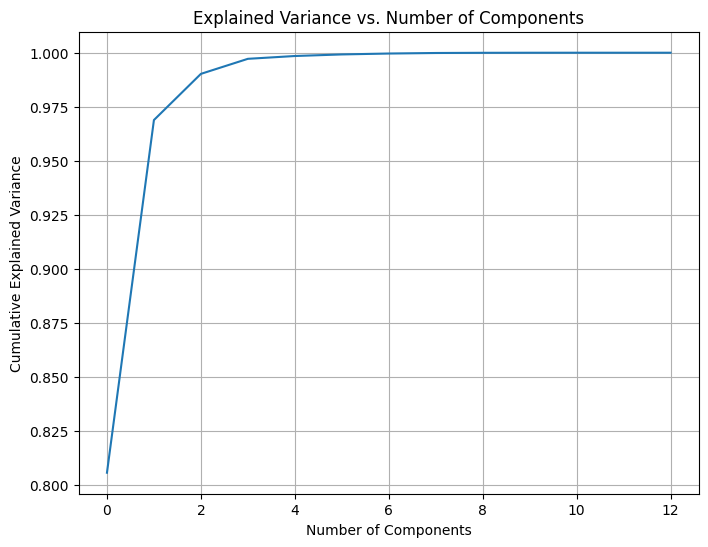

In [104]:
import matplotlib.pyplot as plt

pca = PCA().fit(X_boston)

# Визуализация
plt.figure(figsize=(8,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.grid(True)
plt.show()

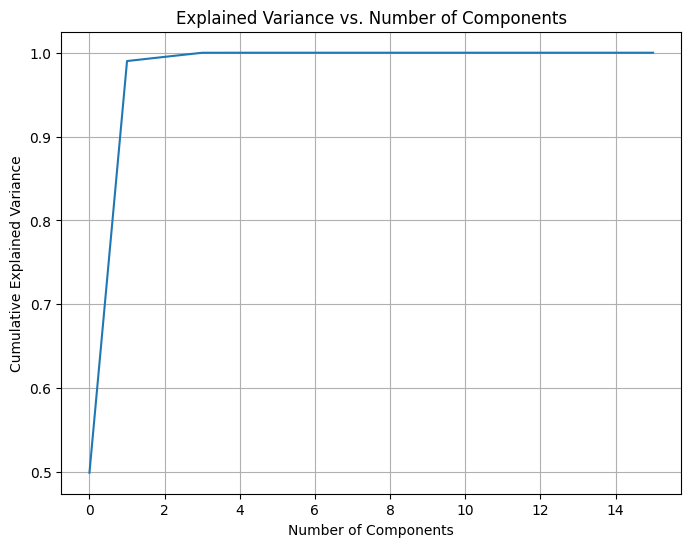

In [105]:
pca = PCA().fit(X_paris)

# Визуализация
plt.figure(figsize=(8,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.grid(True)
plt.show()